In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [85]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
matplotlib.rcParams.update({'font.size': 16})

In [88]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()


Описание датасета

* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [89]:
# TRAIN_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/train.csv'
# TEST_DATASET_PATH = 'test.csv'

In [90]:
url2 = 'https://raw.githubusercontent.com/elenaslavutina/lesson10_project/main/test.csv'
url1 = 'https://raw.githubusercontent.com/elenaslavutina/lesson10_project/main/train.csv'

In [91]:
train_df = pd.read_csv(url1)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [92]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [93]:
test_df = pd.read_csv(url2)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [94]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [95]:
train_df.shape[1] - 1 == test_df.shape[1]


True

Приведение типов

In [96]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [97]:
#train_df['Id'] = train_df['Id'].astype(str)
#train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [98]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

1. EDA

Делаем EDA для:


Исправления выбросов

Заполнения NaN

Идей для генерации новых фич


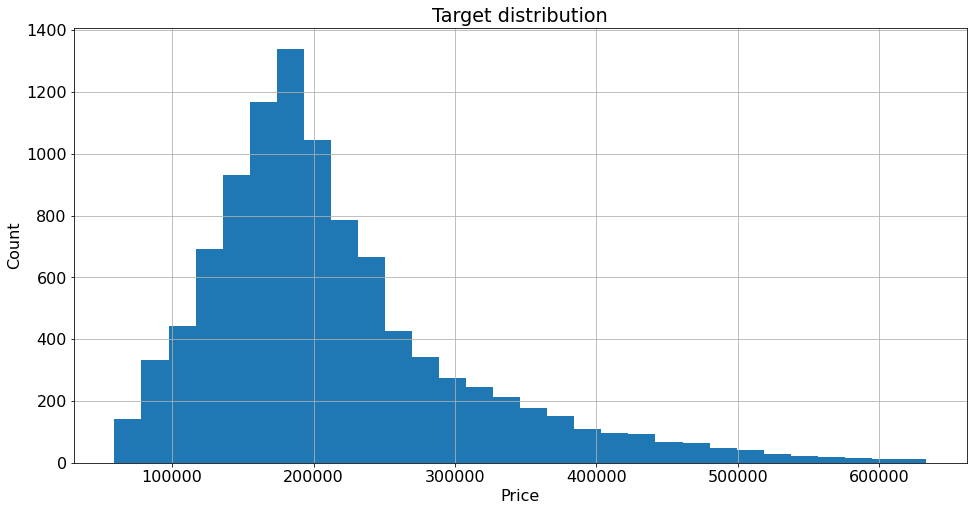

In [99]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [100]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [101]:
train_df.select_dtypes(include='object').columns.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

In [102]:
train_df['DistrictId'].value_counts()


27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [103]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [104]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [105]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

2. Обработка выбросов

Что можно делать с ними?


Выкинуть эти данные (только на трейне, на тесте ничего не выкидываем)

Заменять выбросы разными методами (медианы, средние значения, np.clip и т.д.)

Делать/не делать дополнительную фичу

Ничего не делать

In [106]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Создаем новую фичу.
Для количества комнат 0 или больше или равно 6 фича принимает значение 1

In [107]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.loc[(train_df['Rooms_outlier']==1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792,1
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646,1
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863,1
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788,1
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463,1
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704,1
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007,1
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887,1
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112,1
8794,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416,1


In [108]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()
train_df.loc[(train_df['Rooms_outlier']==1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
2004,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792,1
2194,3159,88,1.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646,1
2728,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863,1
3780,7317,27,1.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788,1
5894,770,28,1.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463,1
6088,8491,1,2.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704,1
6401,9443,27,1.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007,1
7644,7917,27,1.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887,1
7929,456,6,1.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112,1
8794,14003,99,2.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416,1


In [109]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [110]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [111]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [112]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [113]:
train_df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

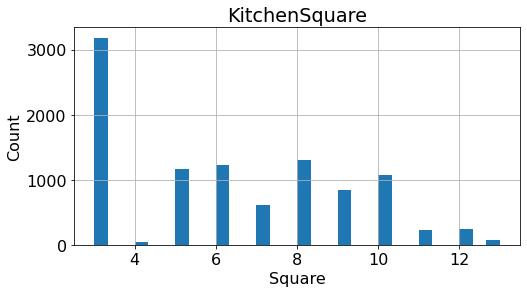

In [114]:
plt.figure(figsize = (8, 4))

train_df['KitchenSquare'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Square')

plt.title('KitchenSquare')
plt.show()

In [115]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [116]:
train_df['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        4
28.0        3
99.0        2
48.0        2
39.0        2
44.0        1
36.0        1
26.0        1
45.0        1
29.0        1
38.0        1
47.0        1
117.0       1
31.0        1
Name: HouseFloor, dtype: int64

In [117]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [118]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

Новая фича для этажа. Если этаж 0 или больше чем количество этажей в доме, фича = 1

In [119]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [120]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [121]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [122]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

In [123]:
train_df.loc[floor_outliers]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier
17,1190,8,2.0,49.396000,28.299600,5.0,1,5.0,1962,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.926566,0,1
19,367,45,1.0,42.367289,40.012529,3.0,12,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777,0,1
21,8471,20,3.0,75.611065,47.494621,8.0,8,9.0,1976,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.246494,0,1
25,4521,6,2.0,65.409965,NaN,3.0,1,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.272608,0,1
26,8553,88,3.0,83.262530,4.769174,3.0,1,1.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,410883.892020,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,7659,57,1.0,38.485252,22.550608,8.0,11,17.0,1992,0.133215,B,B,49,11395,3,1406.0,3,4,A,183485.284995,0,1
9960,16258,48,3.0,96.056784,98.152802,3.0,1,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,0,1
9968,9920,1,3.0,86.487550,NaN,3.0,2,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,248248.935528,0,1
9970,13501,6,1.0,41.310416,19.117077,9.0,15,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,114878.830713,0,1


Обработка HouseYear

In [124]:

train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [125]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [126]:
train_df.loc[train_df['HouseYear'] > 2021, 'HouseYear'] = 2021
train_df['HouseYear'].sort_values(ascending=False)

8828    2021
9163    2021
7246    2020
2350    2020
8296    2020
        ... 
7610    1916
6250    1914
2066    1912
2795    1912
6794    1910
Name: HouseYear, Length: 10000, dtype: int64

In [127]:
groupby = train_df.groupby('HouseYear')
groupby.agg({"HouseYear": "count"})

,HouseYear
HouseYear,
1910,1
1912,2
1914,1
1916,1
1917,3
...,...
2017,308
2018,175
2019,79


Обработка пропусков

In [128]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [129]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(20)



,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,3.0
4,64.285067,38.562517,9.0
5,62.528465,47.103833,6.0
6,33.938750,21.772930,9.0
7,50.391814,32.893256,8.0
8,46.887892,44.628132,3.0
9,79.867477,75.085125,3.0


In [130]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1

condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())
ind = train_df.loc[condition].index    
ind    


Int64Index([   0,    3,   18,   20,   24,   25,   30,   35,   38,   44,
            ...
            9945, 9950, 9963, 9968, 9969, 9975, 9978, 9981, 9983, 9991],
           dtype='int64', length=2113)

In [131]:
train_df.loc[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089,0,0,1
3,2352,1,1.0,40.409907,NaN,3.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630,0,0,1
18,4581,1,1.0,47.582480,NaN,3.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810,0,0,1
20,8768,63,1.0,50.974891,NaN,3.0,7,16.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,260328.413376,0,0,1
24,4717,27,1.0,44.203947,NaN,3.0,2,13.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,4944,6,2.0,52.573133,NaN,3.0,17,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,154366.031184,0,1,1
9978,4851,1,1.0,39.314342,NaN,3.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,137782.941940,0,0,1
9981,6753,62,2.0,73.092686,NaN,3.0,4,16.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,159077.198056,0,0,1
9983,647,1,2.0,63.324025,NaN,3.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114,0,0,1


In [132]:
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3

In [133]:
train_df.loc[ind]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089,0,0,1
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630,0,0,1
18,4581,1,1.0,47.582480,41.582480,3.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810,0,0,1
20,8768,63,1.0,50.974891,44.974891,3.0,7,16.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,260328.413376,0,0,1
24,4717,27,1.0,44.203947,38.203947,3.0,2,13.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,4944,6,2.0,52.573133,46.573133,3.0,17,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,154366.031184,0,1,1
9978,4851,1,1.0,39.314342,33.314342,3.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,137782.941940,0,0,1
9981,6753,62,2.0,73.092686,67.092686,3.0,4,16.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,159077.198056,0,0,1
9983,647,1,2.0,63.324025,57.324025,3.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114,0,0,1


In [134]:
train_df.drop('Healthcare_1', axis=1, inplace=True)
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089,0,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407,0,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850,0,0,0
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630,0,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962,0,0,0
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2,4,B,161044.944138,0,0,0
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,0,3,B,142402.739272,0,0,0
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,5,5,B,326174.175191,0,0,0
8,9951,1,1.0,46.887892,44.628132,3.0,12,20.0,1977,0.007122,B,B,1,264,0,0,1,B,160400.401732,0,0,0
9,8094,6,3.0,79.867477,75.085125,3.0,3,17.0,2014,0.243205,B,B,5,1564,0,0,0,B,194756.023945,0,0,0


In [135]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

4. Построение новых признаков

Dummies

In [136]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [137]:
distCount = train_df.groupby('DistrictId')
distCount.agg({"DistrictId": "count"})


,DistrictId
DistrictId,
0,48
1,652
2,78
3,82
4,11
...,...
202,2
205,1
207,1


DistrictSize, IsDistrictLarge

In [138]:

district_size = train_df['DistrictId'].value_counts().reset_index()\
                  .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})



In [139]:
district_size.head(10)
    

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
5,62,247
6,30,228
7,58,179
8,53,174
9,21,165


In [140]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0,1,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0,0,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0,0,652
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,0,1,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0,0,89


In [141]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [142]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0,1,851,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0,0,78,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0,0,652,1
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,0,1,652,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0,0,89,0
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,1,1,35,5776,1,2,4,1,161044.944138,0,0,0,97,0
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,1,1,24,4860,1,0,3,1,142402.739272,0,0,0,104,1
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,1,1,37,7687,11,5,5,1,326174.175191,0,0,0,67,0
8,9951,1,1.0,46.887892,44.628132,3.0,12,20.0,1977,0.007122,1,1,1,264,0,0,1,1,160400.401732,0,0,0,652,1
9,8094,6,3.0,79.867477,75.085125,3.0,3,17.0,2014,0.243205,1,1,5,1564,0,0,0,1,194756.023945,0,0,0,511,1


**MedPriceByDistrict**

In [143]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

**Разбиваем данные по количеству комнат**

In [144]:
df1 = med_price_by_district[med_price_by_district['Rooms'] == 1]
df2 = med_price_by_district[med_price_by_district['Rooms'] == 2]
df3 = med_price_by_district[med_price_by_district['Rooms'] == 3]
df4 = med_price_by_district[med_price_by_district['Rooms'] == 4]
df5 = med_price_by_district[med_price_by_district['Rooms'] == 5]


In [145]:
# Сортируем данные по цене
df1_sort = df1.sort_values(by='MedPriceByDistrict')
df2_sort = df2.sort_values(by='MedPriceByDistrict')
df3_sort = df3.sort_values(by='MedPriceByDistrict')
df4_sort = df4.sort_values(by='MedPriceByDistrict')
df5_sort = df5.sort_values(by='MedPriceByDistrict')


**Строим графики зависимости цены по району от района, при фиксированном количестве комнат.**

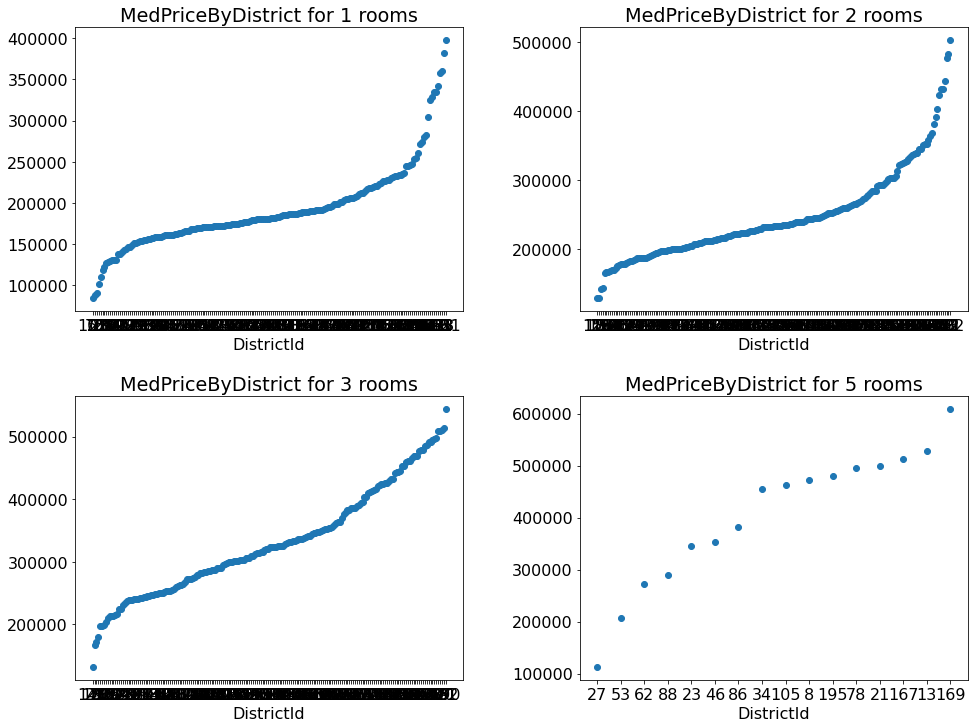

In [146]:

fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax5 = ax.flatten()

y1 = df1_sort['MedPriceByDistrict']
y2 = df2_sort['MedPriceByDistrict']
y3 = df3_sort['MedPriceByDistrict']
y4 = df4_sort['MedPriceByDistrict']
y5 = df5_sort['MedPriceByDistrict']
fig.set_size_inches(16, 12)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.set_xlabel('DistrictId')
ax2.set_xlabel('DistrictId')
ax3.set_xlabel('DistrictId')
ax5.set_xlabel('DistrictId')
ax1.set_title('MedPriceByDistrict for 1 rooms')
ax2.set_title('MedPriceByDistrict for 2 rooms')
ax3.set_title('MedPriceByDistrict for 3 rooms')
#ax4.set_title('MedPriceByDistrict for 4 rooms')
ax5.set_title('MedPriceByDistrict for 5 rooms')
len_df5 = df5_sort.shape[0]
len_df1 = df1_sort.shape[0]
len_df2 = df2_sort.shape[0]
len_df3 = df3_sort.shape[0]
len_df4 = df4_sort.shape[0]

x5 = pd.Series(np.arange(len_df5))
x4 = pd.Series(np.arange(len_df4))
x3 = pd.Series(np.arange(len_df3))
x2 = pd.Series(np.arange(len_df2))
x1 = pd.Series(np.arange(len_df1))

ax1.set_xticks(x1)
ax2.set_xticks(x2)
ax3.set_xticks(x3)
#ax4.set_xticks(x4)
ax5.set_xticks(x5)

x5_legend = df5_sort['DistrictId'].values
ax5.set_xticklabels(x5_legend)
ax5.scatter(x5, y5, label='rooms=5')

x4_legend = df4_sort['DistrictId'].values
#ax4.set_xticklabels(x4_legend)
#ax4.scatter(x4, y4, label='rooms=4')

x3_legend = df3_sort['DistrictId'].values
ax3.set_xticklabels(x3_legend)
ax3.scatter(x3, y3, label='rooms=3')

x2_legend = df2_sort['DistrictId'].values
ax2.set_xticklabels(x2_legend)
ax2.scatter(x2, y2, label='rooms=2')

x1_legend = df1_sort['DistrictId'].values
ax1.set_xticklabels(x1_legend)
ax1.scatter(x1, y1, label='rooms=1')
plt.show()

**Смотрим массивы значений районов. Они отсортированы от дешевых к дорогим**

In [147]:
x1_legend

array([102,  76,  51,  23, 150,  27,  58, 164,  30,  62, 193,   6,  52,
         9, 192, 209,   0,  93,  22,   1,   3,  25, 101,  29,  21, 127,
        90, 187,  91, 165, 119,  39,  36,  99,  94,  80, 126,  60,  84,
        85,  33,  42,  83,   8,  11,  19,  74,  55, 178,  78,  10,  57,
       125,  15,  98,  75, 160, 147,  49,  44,  18,  96, 153,  81,  71,
       129, 112,  28, 130,  46, 176,  41,   2,  67,  12,  72, 110,  47,
        86,  89, 105, 128, 122, 144,  14,  87,  77, 124, 106,  32, 145,
       138, 108,  61, 139, 177,  13, 111, 118, 191, 123,  88,  37, 103,
         7, 114, 155, 167,  26,  97, 168, 107, 148, 142,  92,  35,  79,
        24, 113, 170,  34,  53, 132,  64, 149,  20, 180,  70, 169,  66,
        40, 100, 146,  31,  48,  69,  17, 116, 171, 140, 120, 151, 134,
       121,  59, 205,   4, 157,   5,  82, 152, 189,  56, 136, 143,  68,
       141, 161,  45, 104, 200, 188, 109,  38, 186, 156,  63, 154,  54,
        50,  43, 163, 175, 131, 183, 162, 201, 133,  95,  73, 18

In [148]:
x2_legend

array([158, 185,  23, 112,  27, 164,  58,  91,  52, 126,  71,   0,  93,
        30,   6,  62, 150, 193, 119,  21,  84,  29,  22,  36,  99,   9,
        19,  75,   3, 179, 101,  90, 127, 102,  79,  98, 105,  39, 148,
        14,  81,  28, 177, 160,  11,   8,  78,  16,  94,   1,   7,  72,
       178,  88, 192,  35,  26,  37,  41,  40, 142,  92, 144, 137,  46,
        57, 129, 125,   2, 113,  44,  10,  49, 161, 120, 107, 194, 118,
        47, 170, 138,  87,  83,  67, 189,  86, 111, 110, 130,  77,  42,
       135,  55, 124,  89,  61, 149, 153,  66,  32, 100,  18, 187, 154,
       146,  85,  80,   5,  33, 140,  95,  96,  12,  17,  13,  74, 143,
       103, 200, 145, 141, 147,  15, 166,  64, 114, 139, 128, 169, 121,
       106,  25, 176, 167, 183, 159,  70, 122, 201,  34,  53, 115, 133,
       152, 109, 171,  68,  24,  51,  38,  73,  50, 163,   4,  63, 184,
       136, 155,  48,  97, 173,  20, 151, 132, 168, 191, 123, 188, 116,
        59,  45,  69, 162, 196,  60, 131,  31,  56, 156, 108, 13

In [149]:
x3_legend

array([140,  23, 102,  71,  73,  30,  93,  52, 119, 152,  27,  62,   6,
        22,  99, 126, 127,  78, 142,   3,  21,   9,  58, 101,  91,  35,
        94,  77,   1, 187,  98,  11, 134,  16, 149,  84, 165,  39,  67,
        87, 125,  83, 143,   5,  80,  46,  61, 139, 112,  10, 121, 100,
        28,  18,  29, 115,  79, 130,  36, 105, 113,  42, 202, 107,  55,
        44,  88,  85,   8, 177,  37, 145, 106,  41, 164,   0,  96, 163,
        47,  75,  49, 185,  57, 153,  15, 128, 103, 191,  26,  12,  25,
       183, 150,   7, 116,   2, 184,  13, 169,  92,  40,  32, 110,  90,
        74, 138, 114,  34, 189, 129,  72, 118,  68,  70, 168, 120,  81,
        66, 122,  53,  60,  19, 193, 136, 170,  24, 124,  82, 147,  64,
       173, 167, 159, 109,  86, 161, 132, 166,   4, 117, 154,  20, 151,
        33,  31, 123,  17, 111,  45,  56,  76, 174,  48, 141,  38, 207,
        69, 182, 146, 199, 148, 135,  63, 104, 155, 179, 176, 144, 178,
        59,  89, 131,  65, 133, 194,  14, 156, 195,  54, 157, 10

In [150]:
x4_legend

array([ 33,  93,   4,  96,  39,  23, 168,  85,  41, 126,   7, 172,  77,
         1, 183,  10,  29,   2,   9, 101, 160,  61,  27,  62, 139, 130,
        66,  11, 194, 110,  37, 177,  42, 155,  25,  34,  15,  55,  46,
        30, 120, 178, 129,  28,  20, 191, 111,   8,  13, 122,  84, 105,
       128, 159,  54,  40,  78,  44,  45,  17,  98, 167, 175, 180, 148,
       118,  88,  53,  81,  69, 109, 124,  38, 113, 123,  63,  32, 100,
       188,  35,  24,  56,  83, 169, 103,  48,  95])

In [151]:
x5_legend

array([ 27,  53,  62,  88,  23,  46,  86,  34, 105,   8, 195,  78,  21,
       167,  13, 169])

**15 самых дешевых районов**

In [152]:
chip_district = np.hstack((x1_legend[0:3] , x2_legend[0:3] , x3_legend[0:3], x4_legend[0:3], x5_legend[0:3]))

chip_district

array([102,  76,  51, 158, 185,  23, 140,  23, 102,  33,  93,   4,  27,
        53,  62])

**15 самых дорогих районов**

In [153]:
expensive_district = np.hstack((x1_legend[-3:], x2_legend[-3:], x3_legend[-3:], x4_legend[-3:], x5_legend[-3:]))
expensive_district

array([ 95,  73, 181, 181,  43, 202, 171, 162, 190, 103,  48,  95, 167,
        13, 169])

In [154]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0,1,851,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0,0,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0,0,652,1,244005.272380
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,0,1,652,1,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0,0,89,0,201584.441255


**MedPriceByFloorYear**

In [155]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X



In [156]:
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels=False)


0       1
1       2
2       0
3       3
4       4
       ..
9995    0
9996    3
9997    0
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

In [157]:
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0,1,851,1,213530.788443,6,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0,0,78,0,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0,0,652,1,244005.272380,4,1
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,0,1,652,1,146735.671740,3,4
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0,0,89,0,201584.441255,3,5


In [158]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,374737.658654
1,1,2,322905.044793
2,1,3,429825.896082
3,1,4,274992.472366
4,2,1,467230.539057


In [159]:
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0,1,851,1,213530.788443,6,2,163969.984699
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0,0,78,0,146032.829834,3,3,191371.457255
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0,0,652,1,244005.272380,4,1,205459.068863
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,0,1,652,1,146735.671740,3,4,184241.607653
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0,0,89,0,201584.441255,3,5,173028.982008


--------------------

In [160]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
      

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
     
       
        #print(self.district_size)
        #print(X['DistrictSize'])
        X = X.merge(self.district_size, on='DistrictId', how='left')

        #print(X.columns.values)

        X['new_district'] = 0
       
     
        #print(X['DistrictSize_y'])

        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

Отбор признаков

In [161]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge',  'MedPriceByDistrict', 'MedPriceByFloorYear']

target_name = 'Price'

**Разбиение** на train и **test**

In [162]:
train_df = pd.read_csv(url1)
test_df = pd.read_csv(url2)
X = train_df.drop(columns=target_name)
y = train_df[target_name]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 22), (3300, 22), (5000, 22))

In [163]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

In [164]:
X_train.shape

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 29), (3300, 29), (5000, 29))

**7. Построение модели**
***Обучение***

In [165]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

Оценка модели

Train R2:	0.966
Test R2:	0.703


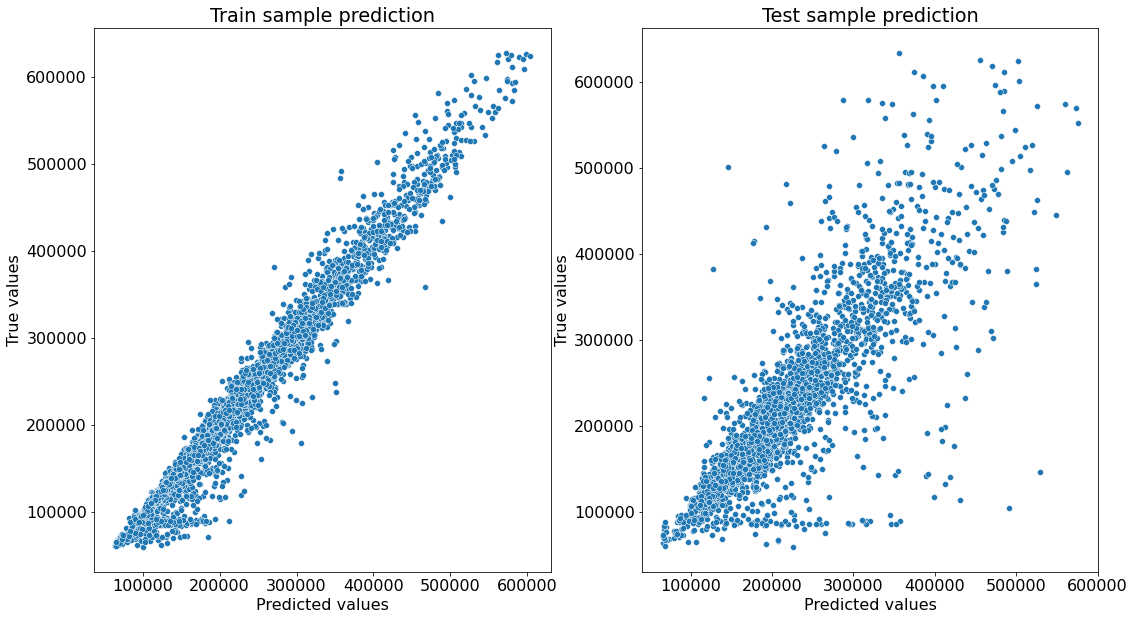

In [166]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

кросс валидация


In [167]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.77097673, 0.72929297, 0.75076366])

In [168]:
cv_score.mean()

0.7503444534547409

8. Прогнозирование на тестовом датасете
Выполнить для тестового датасета те же этапы обработки и постронияния признаков
Не потерять и не перемешать индексы от примеров при построении прогнозов
Прогнозы должны быть для все примеров из тестового датасета (для всех строк)

In [169]:
test_df.shape

(5000, 29)

In [170]:
#submit = pd.read_csv('/kaggle/input/real-estate-price-prediction-moscow/sample_submission.csv')
#submit.head()